##Installing dependencies and setting up GPU environment

In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0

##Importing required dependencies 

In [1]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##To check the version of tensorflow
tf.__version__

'2.2.0'

##Data Preprocessing

###Loading the Dataset

In [2]:
##Loads 60k images data in Train file and 10K image data in Test file
(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#Displaying shape of Train Data
X_train.shape

(60000, 28, 28)

In [4]:
#Displaying shape of X_test Data
X_test.shape

(10000, 28, 28)

In [5]:
#Displaying shape of Y_test Data
Y_test.shape

(10000,)

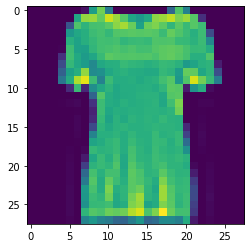

In [6]:
#Displaying the 28*28 image 
plt.imshow(X_train[10])

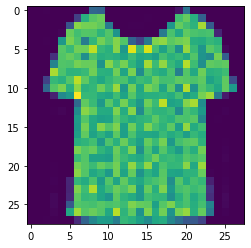

In [7]:
plt.imshow(X_test[1000])

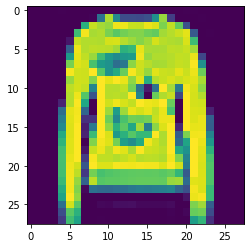

In [8]:
plt.imshow(X_test[5000])

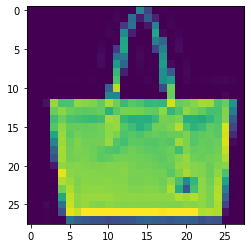

In [9]:
plt.imshow(X_test[7000])

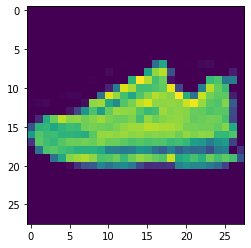

In [10]:
plt.imshow(X_test[8000])

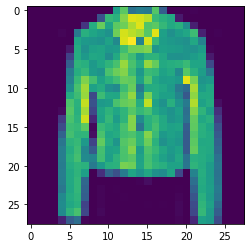

In [11]:

plt.imshow(X_test[10])

##Image Normalization

Every pixel in image is in range 0-255.

Therefore we divide each pixel by 255 (Maximum number of pixel) to normalise the values of each pixel in both train and test set.

This steps will convert pixel in range [0,1].

By normalising we are making sure that our ANN model runs faster.




In [12]:
X_train= X_train / 255.0

In [13]:
X_test= X_test / 255.0

The input images are in 3 dimensions

First dimension has index number 
next two dimensions have arrays containing pixel of the images

In [14]:
X_train.shape

(60000, 28, 28)

##Reshapping the input in required shape by Neural Network

*   Flatening 60K input into 60k one dimension vectors.

*   Since we are using fully connected network, we reshape the training and testing subsets to be in the vector format. 



In [15]:
#Reshaping
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [16]:
#Reshaping
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

In [17]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Building an Artificial Neural Network

### Defining the model

Simply define an object of the Sequential model.

In [18]:
##Model Object
model= tf.keras.models.Sequential()

### Adding the first layer in ANN( Using Dense function)

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [19]:
model.add(tf.keras.layers.Dense(units=128, activation="relu", input_shape=(784,)))

###Adding Dropout Layer
Dropout is Regularization technique where we randomly set neurons in a layer to zero.

In this way, while training those neurons will not be updated.

As some neurons wont get updated, we have less chance for overfitting.

In [20]:
model.add(tf.keras.layers.Dropout(0.2))

###Adding Output Layer



*  units = number of classes (10 in the case of Fashion MNIST Dataset)
*  activation = 'softmax'



In [21]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

###Compiling The Model


*   Optimizer = adam
*   Loss = Sparse Categorical Crossentropy (For Multi-Class Classification)




In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["sparse_categorical_accuracy"])

###Generating Summary of the built ANN Model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


###Training the model
Epochs represents the number of iterations

In [24]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5262 - sparse_categorical_accuracy: 0.8134
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4037 - sparse_categorical_accuracy: 0.8532
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3662 - sparse_categorical_accuracy: 0.8670
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3441 - sparse_categorical_accuracy: 0.8735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3299 - sparse_categorical_accuracy: 0.8778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3168 - sparse_categorical_accuracy: 0.8828
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3058 - sparse_categorical_accuracy: 0.8850
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - sparse_categorical_accuracy: 0.8893
Epoch 9/10
1875/1875 [==========

###Model Evaluation and Prediction

In [ ]:
test_loss, test_accuracy= model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8781


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8780999779701233


##Saving The Model

### Saving the architecture (topology) of the network

In [ ]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

### Saving network weights

In [ ]:
model.save_weights("fashion_model.h5")